# Cross Validation

The purpose of this section is to investigate whether (and how well) cross validation can recover the true sparsity parameter $k$. We tested normal, logistic, and poisson cross validation results using 5 fold cross validation across 20 different model sizes $k \in \{1,2,...,20\}$ where $k_{true} = 10$. Since the purpose is on validating cross validation and not to test scalability, we ran code on 5000 samples and 100000 SNPs.

In [1]:
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-3740QM CPU @ 2.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, ivybridge)


In [2]:
using Plots
using DelimitedFiles
using Statistics

In [3]:
normal_cv_mses      = readdlm("normal_cv_mses")
normal_cv_memory    = readdlm("normal_cv_memory")
normal_cv_run_times = readdlm("normal_cv_run_times")

normal_cv_mses_nodebias      = readdlm("normal_cv_mses_nodebias")
normal_cv_memory_nodebias    = readdlm("normal_cv_memory_nodebias")
normal_cv_run_times_nodebias = readdlm("normal_cv_run_times_nodebias")

logistic_cv_mses      = readdlm("logistic_cv_mses")
logistic_cv_memory    = readdlm("logistic_cv_memory")
logistic_cv_run_times = readdlm("logistic_cv_run_times")

logistic_cv_mses_nodebias      = readdlm("logistic_cv_mses_nodebias")
logistic_cv_memory_nodeibas    = readdlm("logistic_cv_memory_nodeibas")
logistic_cv_run_times_nodebias = readdlm("logistic_cv_run_times_nodebias")

poisson_cv_mses      = readdlm("poisson_cv_mses")
poisson_cv_memory    = readdlm("poisson_cv_memory")
poisson_cv_run_times = readdlm("poisson_cv_run_times")

poisson_cv_mses_nodebias      = readdlm("poisson_cv_mses_nodebias")
poisson_cv_memory_nodeibas    = readdlm("poisson_cv_memory_nodeibas")
poisson_cv_run_times_nodebias = readdlm("poisson_cv_run_times_nodebias")

30×1 Array{Float64,2}:
 1579.517853189
  568.817563796
 1011.448526263
  549.106707609
  290.559544467
 1312.499708605
  400.669624319
  313.926617941
  549.354585904
  534.180308034
  837.444148671
  680.409099741
 2599.544560632
    ⋮          
  237.078244458
  383.50033907 
 1663.970520715
  877.252827811
  485.279756662
  726.64626035 
  527.447005433
 1306.918793399
 1373.806126349
  318.4998823  
  286.745445694
  410.454660927

# Normal cv plot

10.5


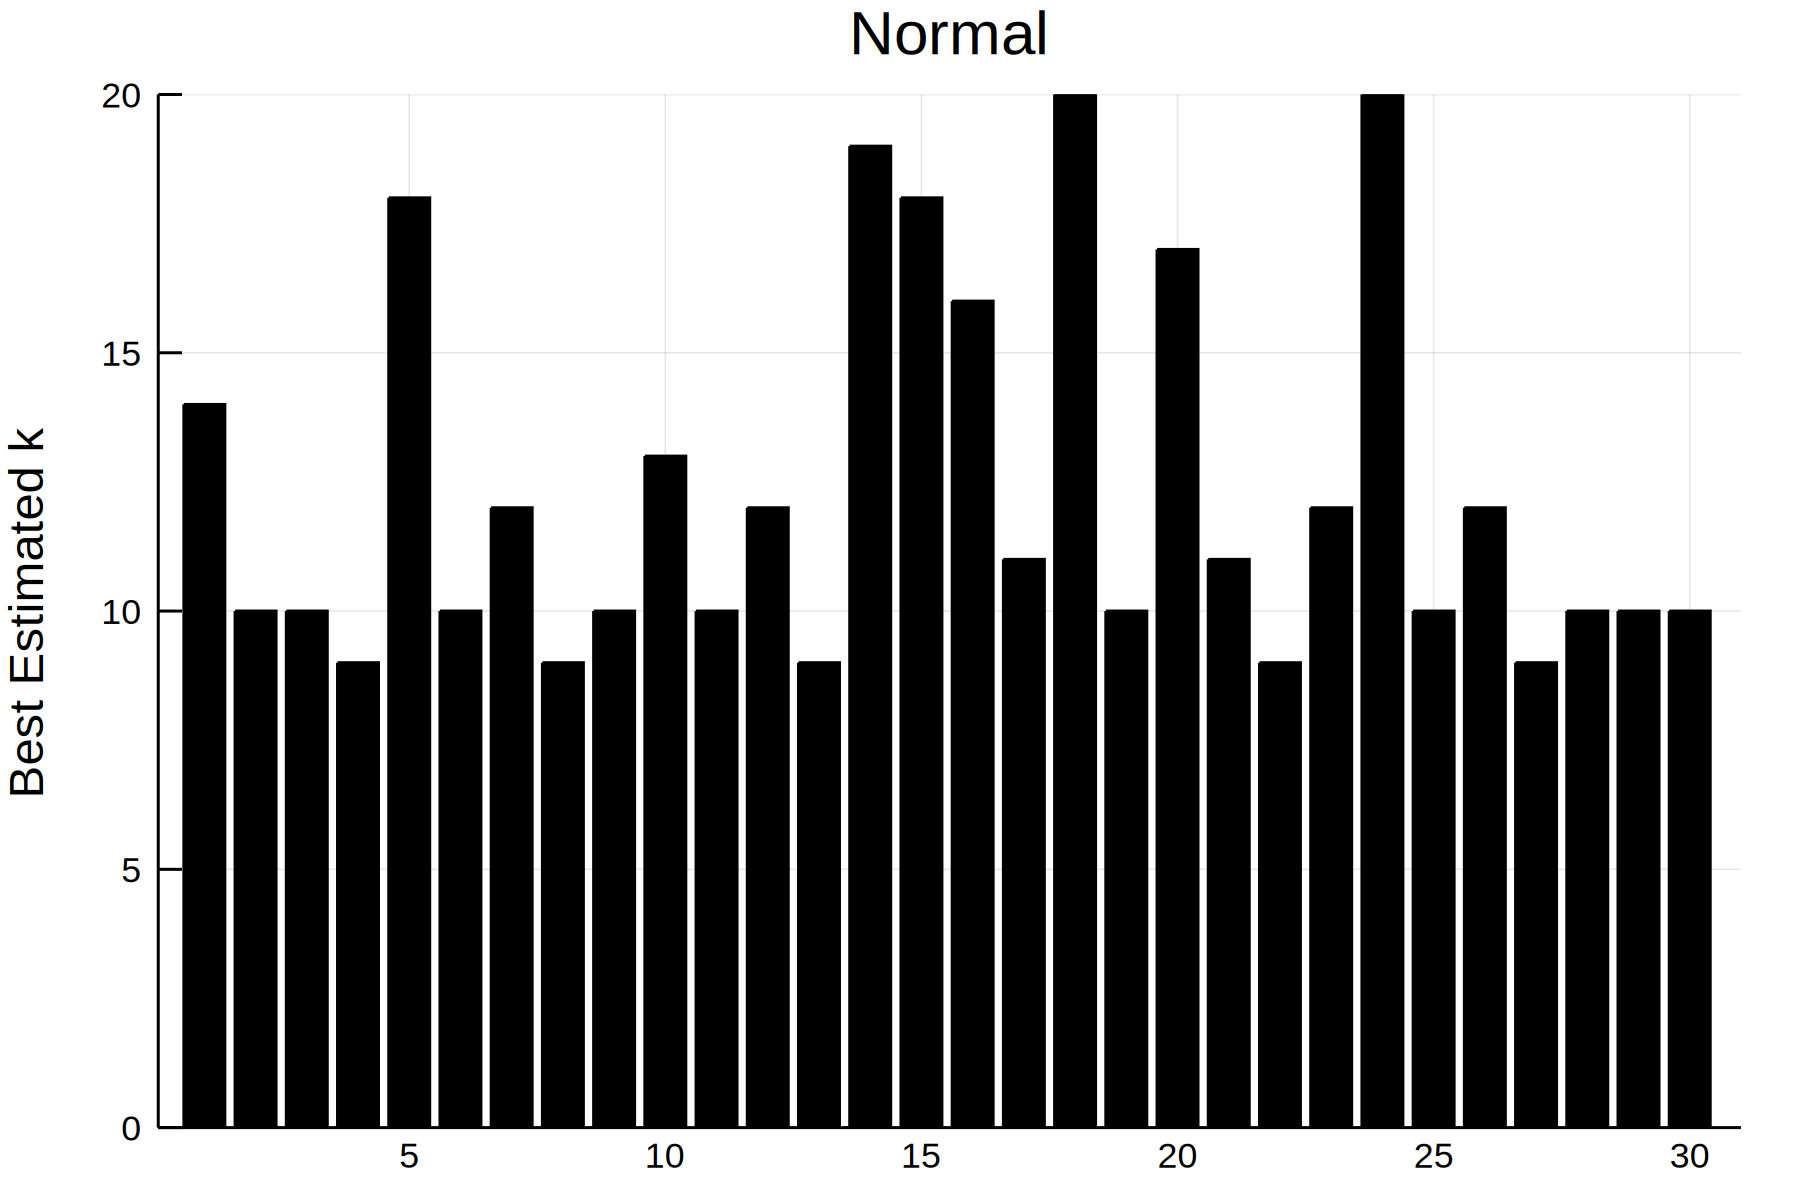

In [22]:
best_k = zeros(30)
for i in 1:30
    best_k[i] = argmin(normal_cv_mses[:, i])
end
println(median(best_k))
normal_bar = bar(best_k, ylim = (0, 20), xlim = (0.1, 31), dpi=300, legend=false, 
    color = :black, title = "Normal", ylabel="Best Estimated k")

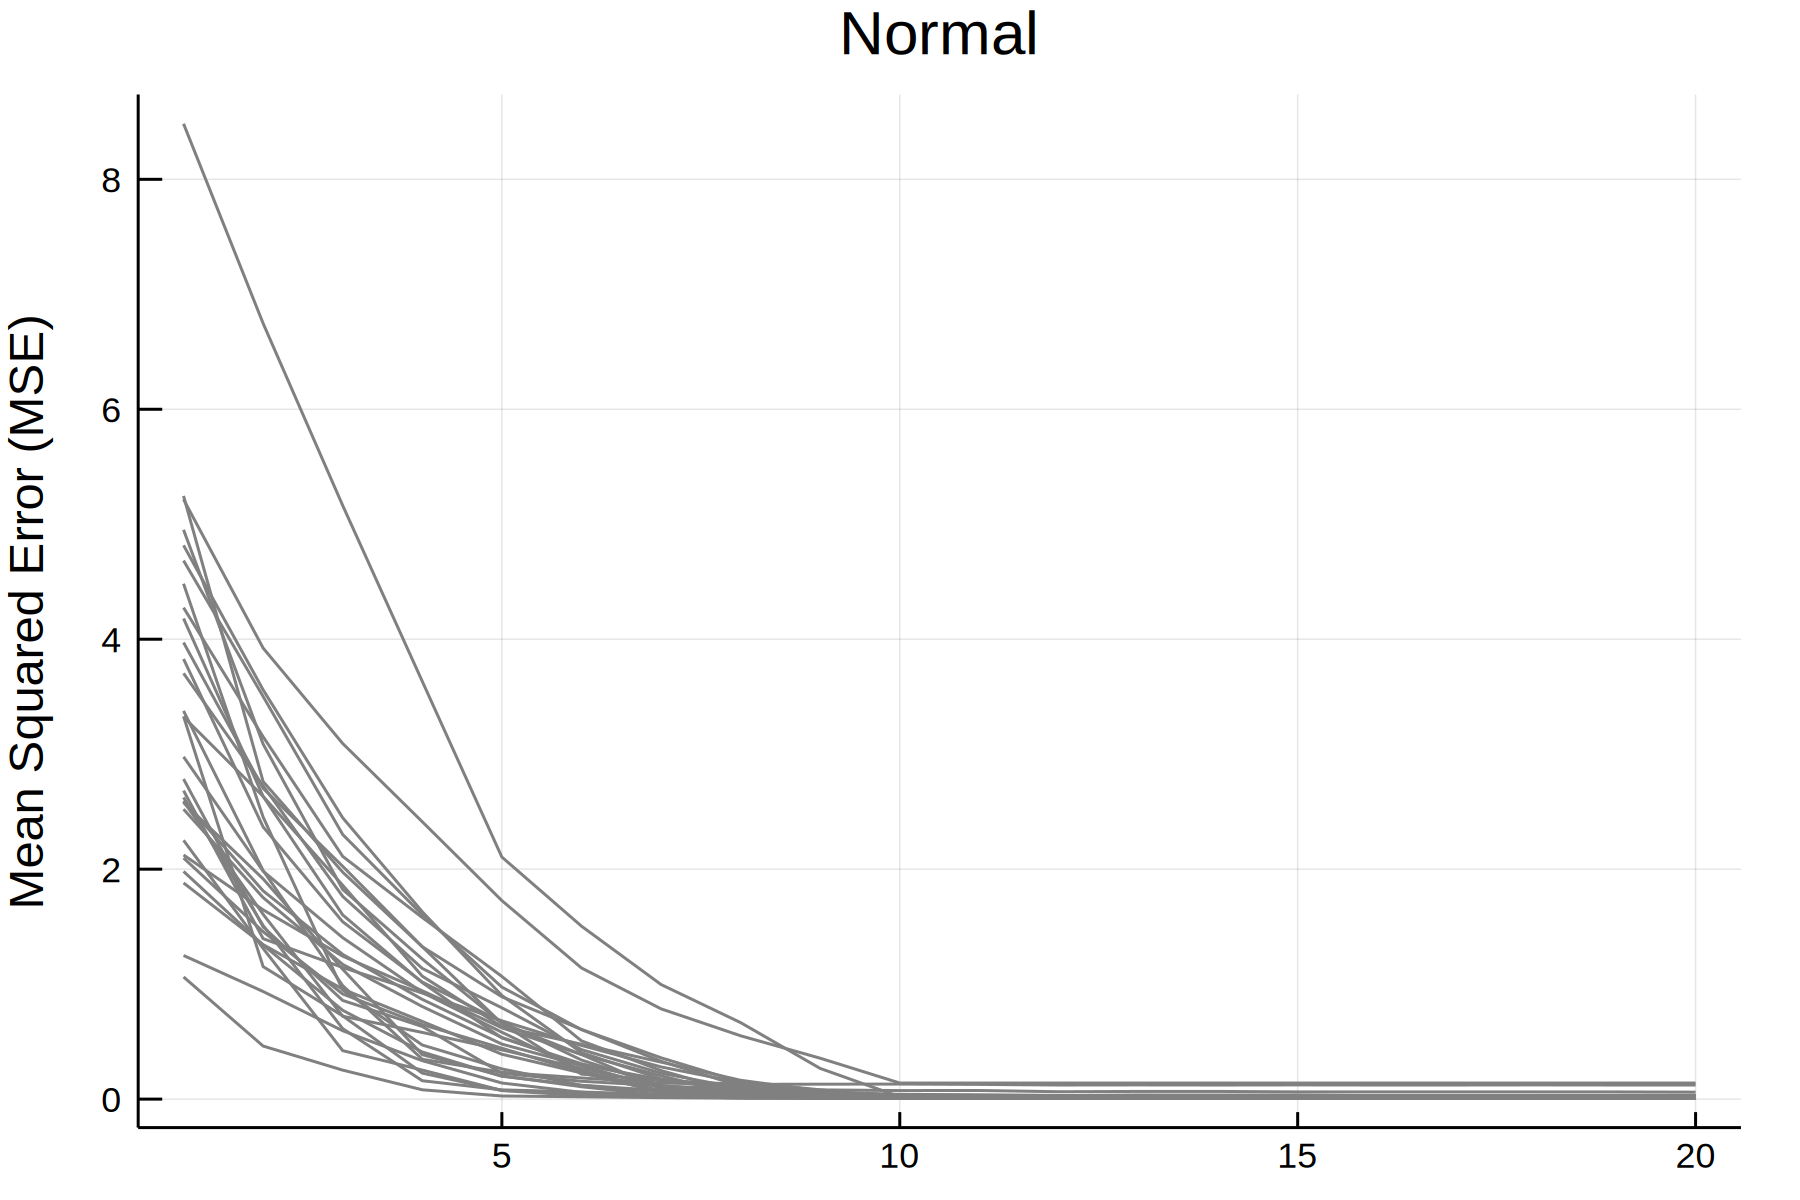

In [5]:
models = collect(1:20)
mylabels = Matrix{String}(undef, 1, 30)
for i in 1:30
    mylabels[1, i] = "run $i"
end
normal_plt = plot(models, normal_cv_mses, dpi = 300, label=mylabels, legend=false, 
    color = :grey, title="Normal", ylabel = "Mean Squared Error (MSE)")

# Logistic CV plot 

8.0


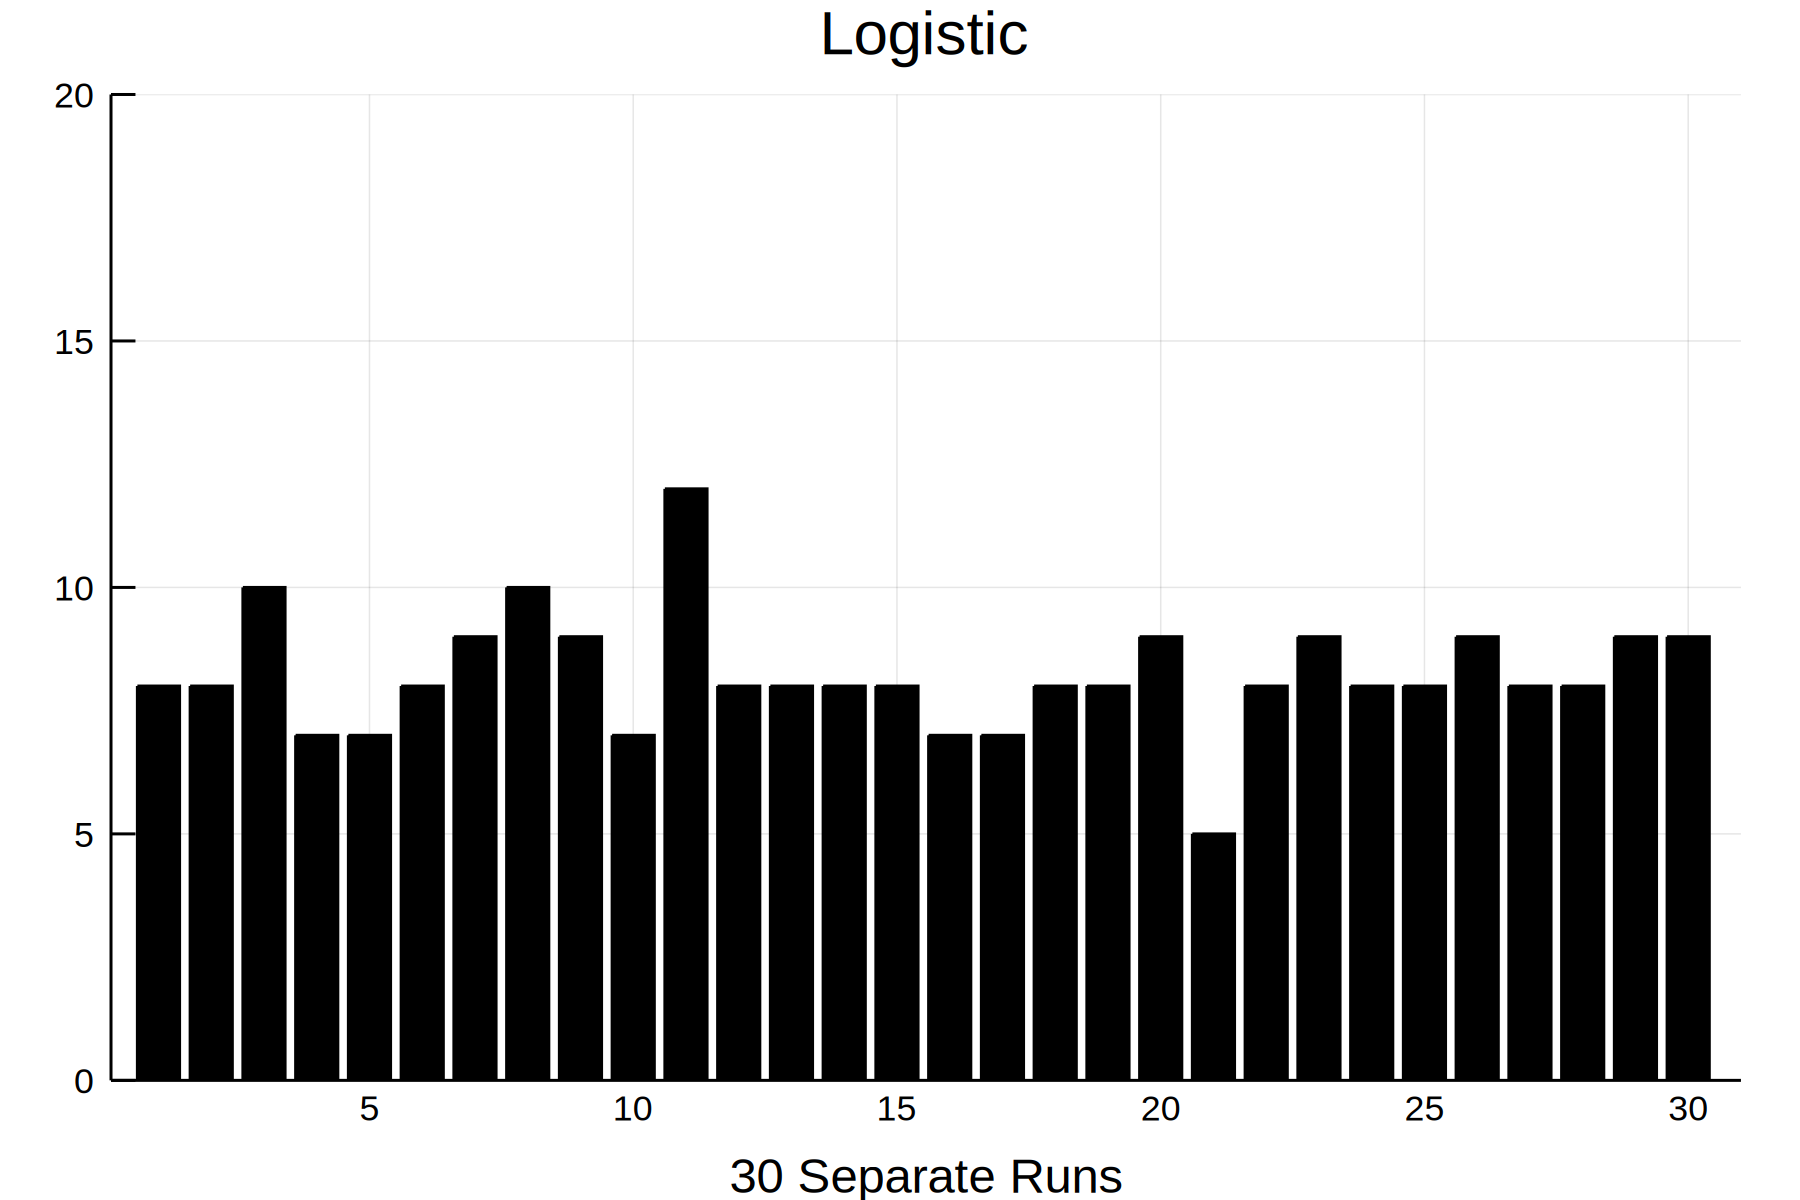

In [16]:
best_k = zeros(30)
for i in 1:30
    best_k[i] = argmin(logistic_cv_mses[:, i])
end
println(median(best_k))
logistic_bar = bar(best_k, ylim = (0, 20), xlim = (0.1, 31), dpi=300, legend=false, 
    color = :black, title = "Logistic", xlabel="30 Separate Runs")

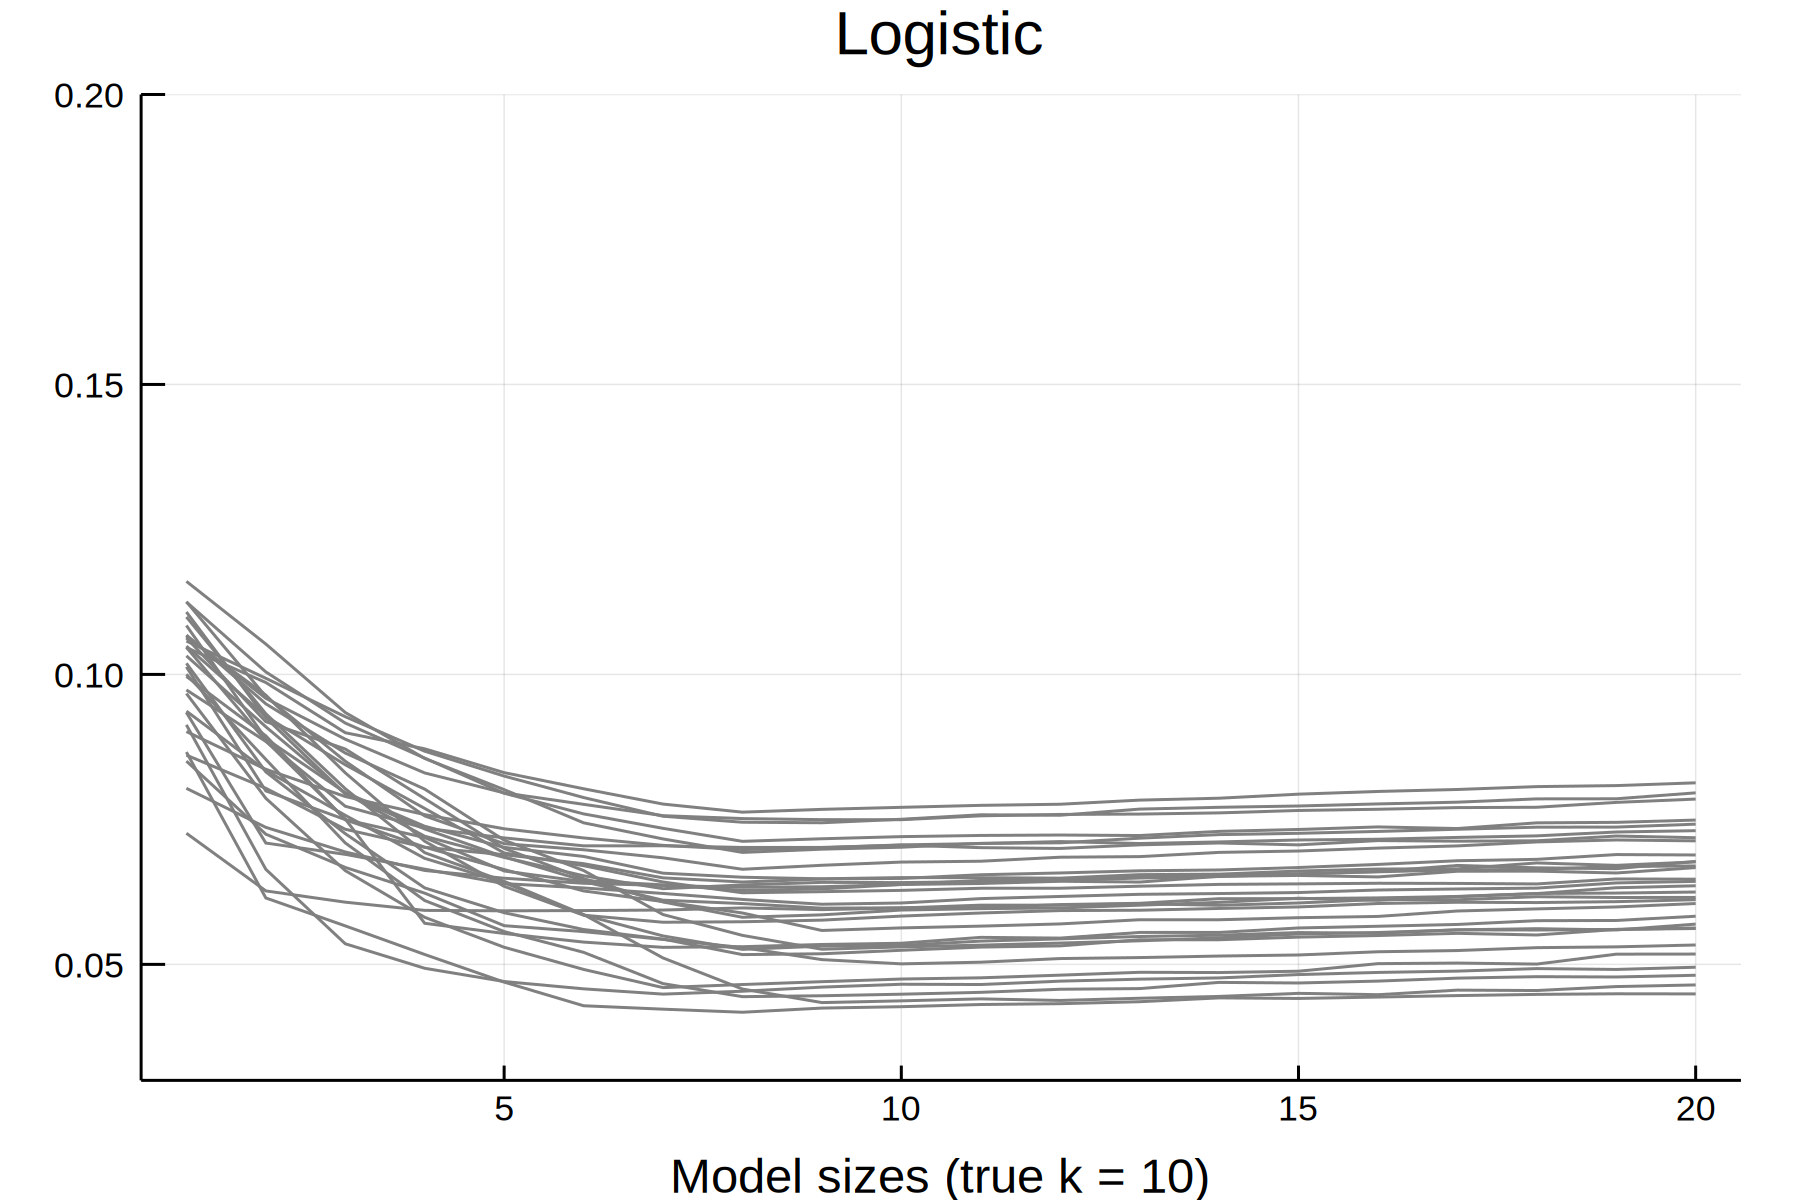

In [7]:
logistic_plt = plot(models, logistic_cv_mses, dpi = 300, label=mylabels, legend=false, 
    title="Logistic", ylim=(0.03, 0.2), color = :grey, xlabel = "Model sizes (true k = 10)", )

# Poisson CV plot

10.0


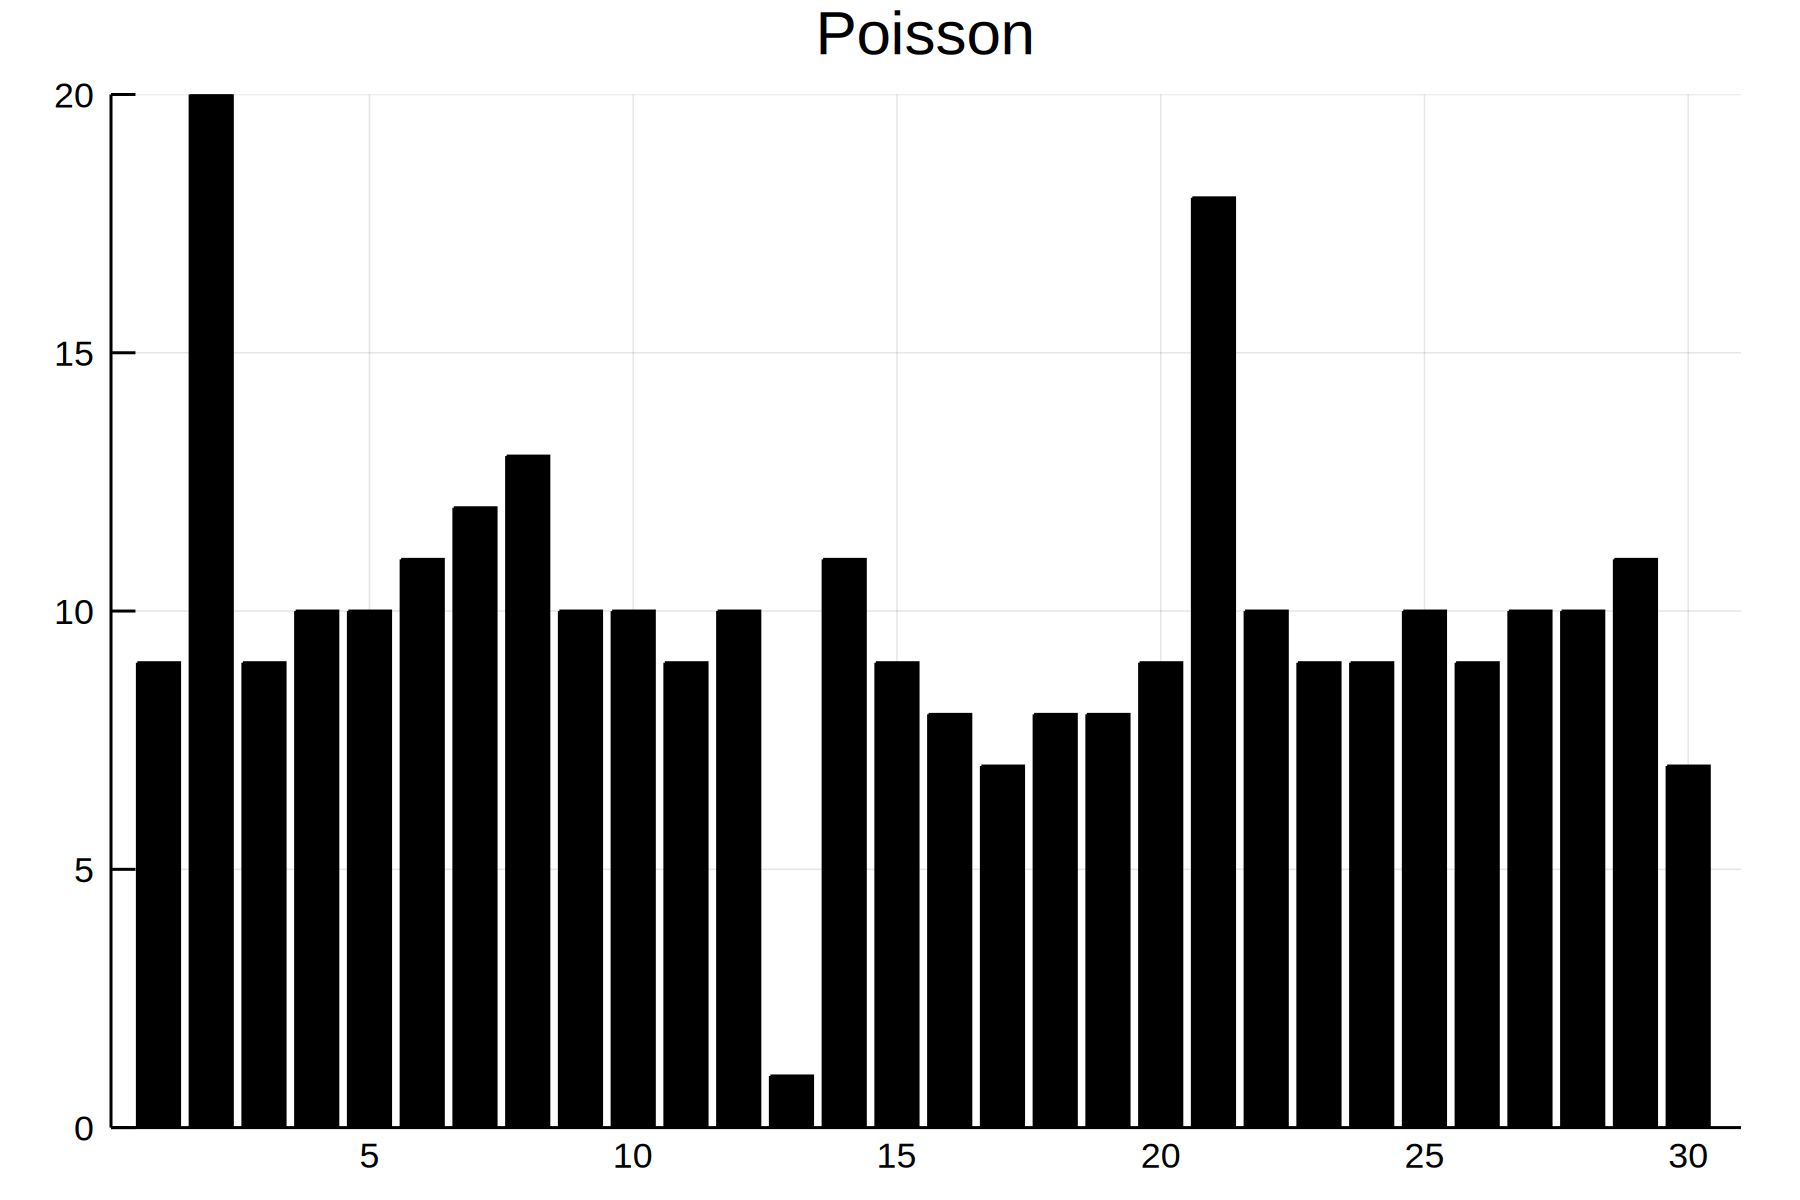

In [21]:
best_k = zeros(30)
for i in 1:30
    best_k[i] = argmin(poisson_cv_mses[:, i])
end
println(median(best_k))
poisson_bar = bar(best_k, ylim = (0, 20), xlim = (0.1, 31), dpi=300, legend=false, 
    color = :black, title = "Poisson")

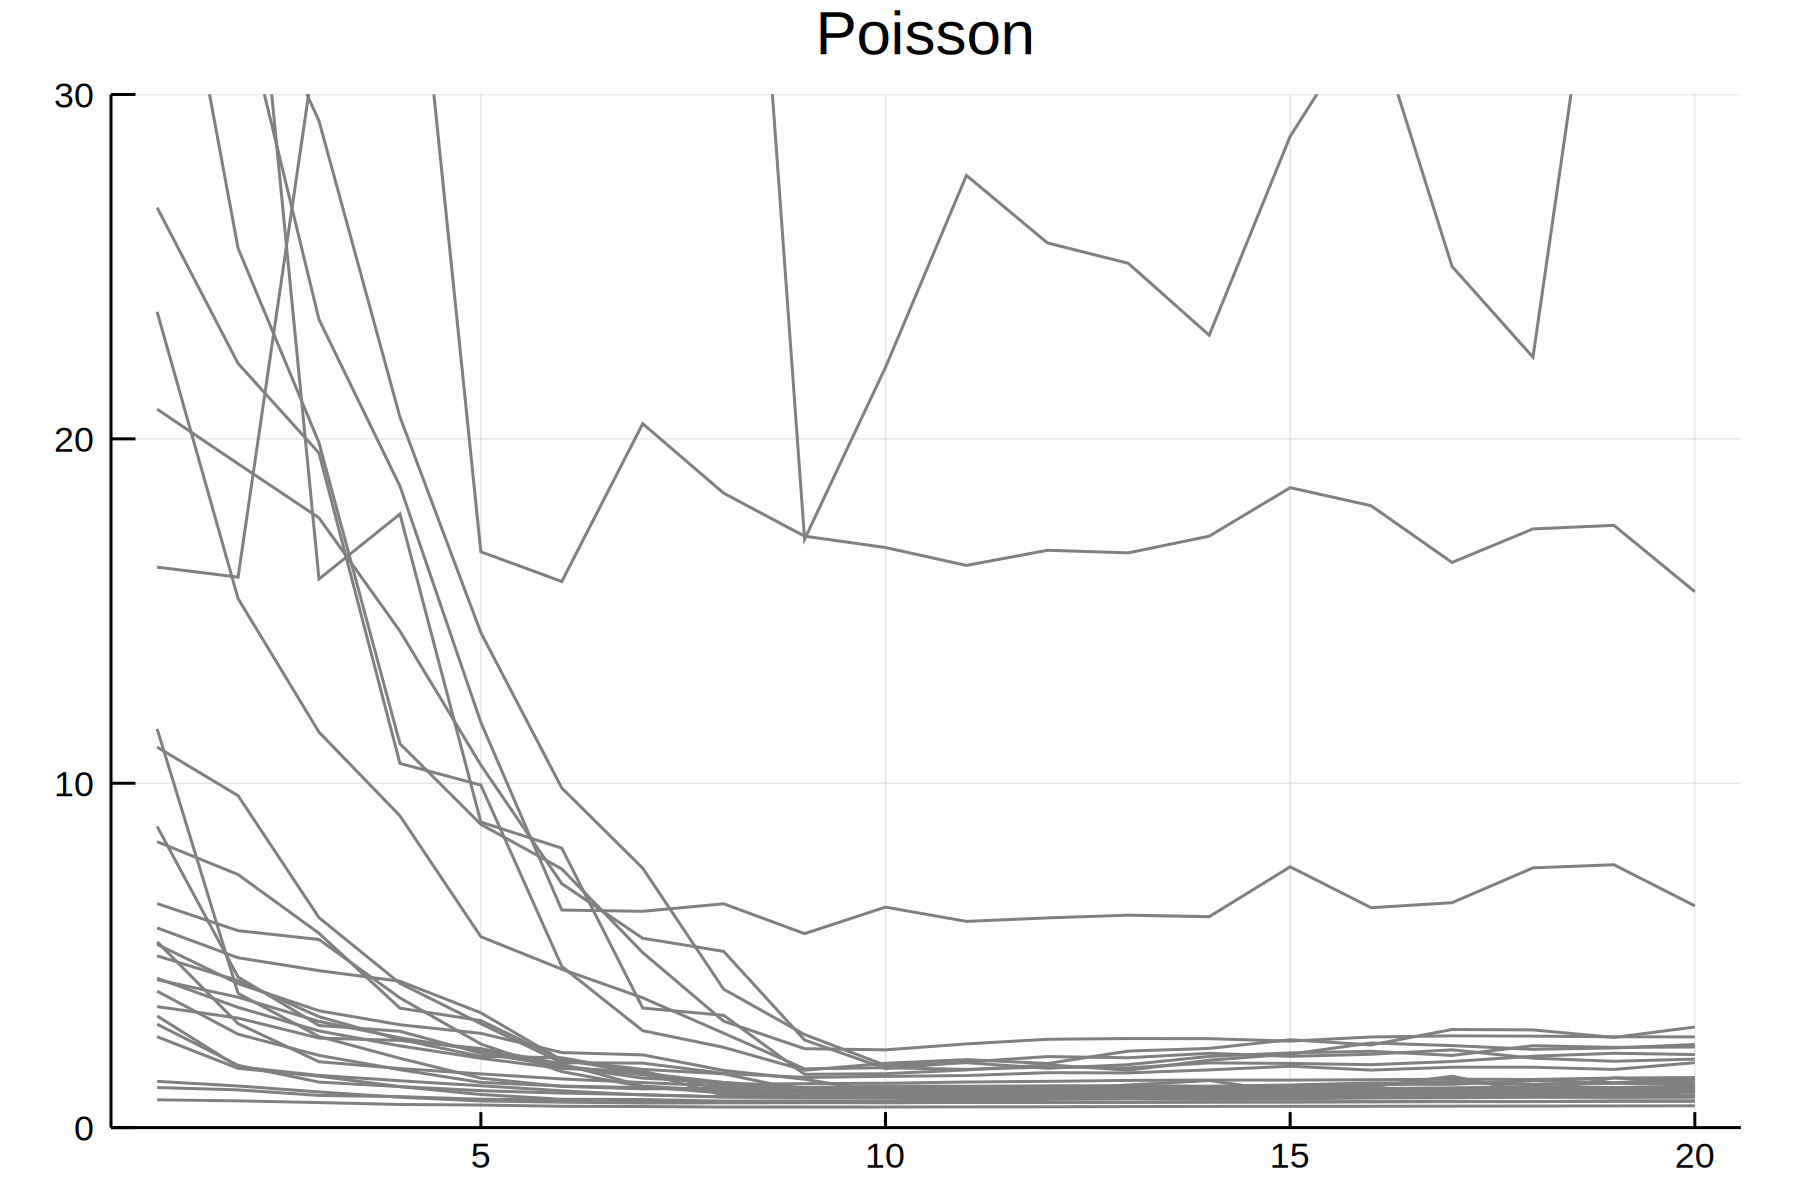

In [9]:
poisson_plt = plot(models, poisson_cv_mses, ylims = (0,30), color = :grey, dpi = 300, 
    label=mylabels, legend=false, title="Poisson")

In [24]:
mse_all_plots = [normal_plt logistic_plt poisson_plt]
mse_all = plot(mse_all_plots..., layout = (1,3))
savefig(mse_all, "mse_all")

In [23]:
all_bar_plots = [normal_bar logistic_bar poisson_bar]
bar_all = plot(all_bar_plots..., layout = (1, 3))
savefig(bar_all, "bar_all")